Figures for Section 1.1

In [4]:
knitr::opts_chunk$set(warning = FALSE, message = FALSE)
library(stringr)
library(dplyr)
library(tidyr)


Figure 1.1

 Wolfer’s sunspot numbers from 1700 to 1994.

In [5]:
# data folder path to be used to concatenate strings
datapath = "../../data/"

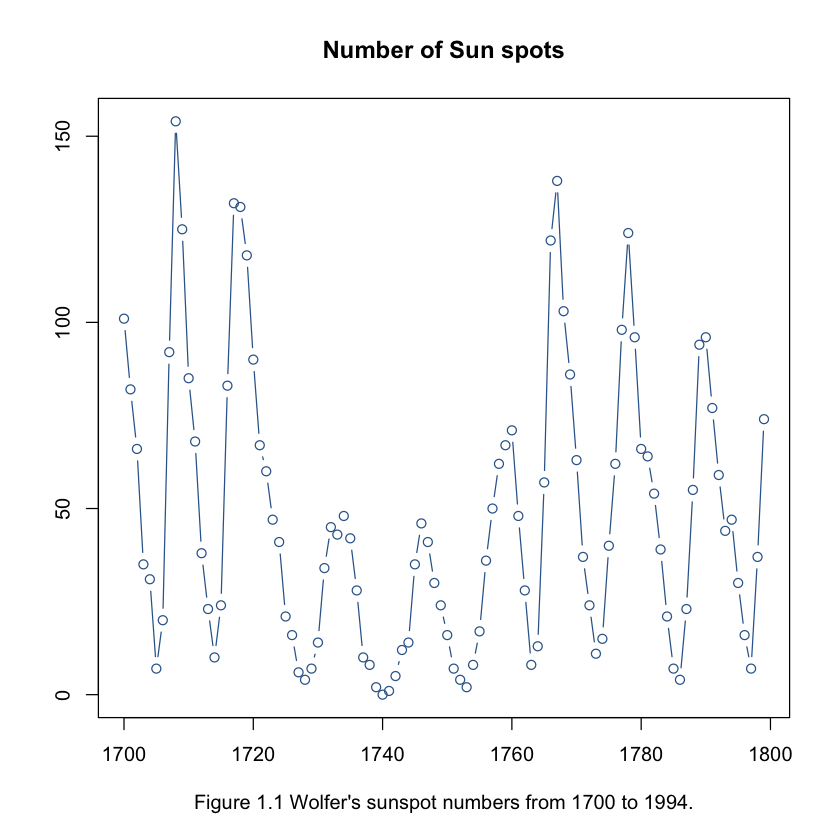

In [14]:
# read data by the data path
spots = read.table(str_c(datapath,"sunspots.dat"))
spots = ts(spots, start=1700, frequency=1)
plot(spots, xlab="Figure 1.1 Wolfer's sunspot numbers from 1700 to 1994.", ylab="", 
col="#336699", type="b", main="Number of Sun spots")

Figure 1.2

Number of lynx trapped in the MacKenzie River district between 1821 and 1934.

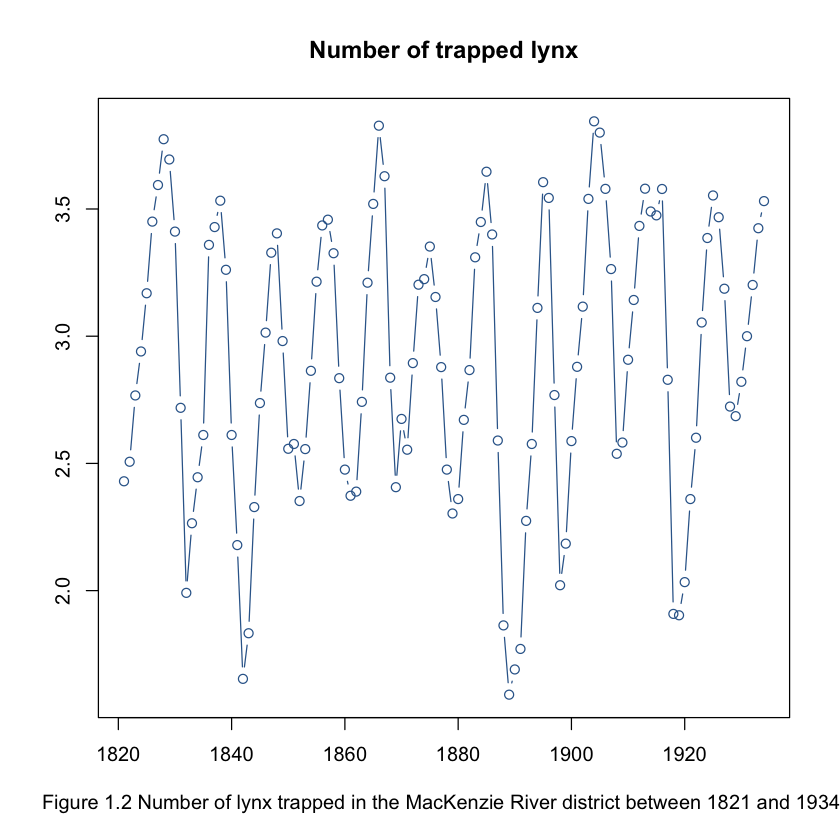

In [15]:
lynx = read.table(str_c(datapath,"lynx.dat"))
lynx = ts(log10(lynx), start=1821, frequency=1)
plot(lynx, xlab="Figure 1.2 Number of lynx trapped in the MacKenzie River district between 1821 and 1934.", ylab="", main="Number of trapped lynx", type="b", col="#336699")

Figure 1.3

Yields of Treasury bills from July 17, 1959, to December 31, 1999.

In [16]:
# clean bills data in files 'bills03.dat', 'bills06.dat','bills12.dat'
cleanBills <- function(fn){
    filepath = str_c(datapath, fn)
    # # print the previous 15 lines to check if there are invalid lines
    # print(readLines(filepath, n=15))

    # read data skipping n valid lines
    # generate a dataframe
    data = read.table(filepath,header = FALSE, sep=",", skip = 14)

    # the original column name is 'V1'
    # Split one column into two: Date and Value, by space
    data <- data %>% separate(V1, c('Date', 'Value'), sep = ' (?=[^ ]+$)')

    # convert class type of values into numeric
    data$Value <- as.numeric(data$Value)
    
    return(data$Value)
}
    

In [17]:
bills03 = cleanBills("bills03.dat")
bills06 = cleanBills("bills06.dat")
bills12 = cleanBills("bills12.dat")

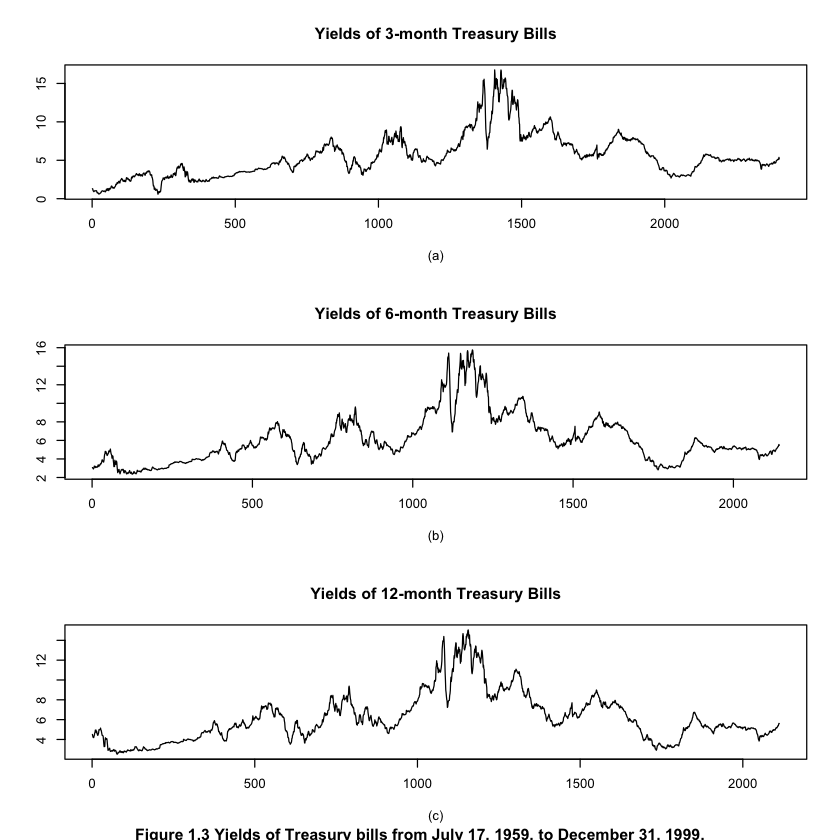

In [36]:
par(mfrow=c(3,1))
plot.ts(bills03, xlab="(a)", ylab="", main="Yields of 3-month Treasury Bills")
plot.ts(bills06, xlab="(b)", ylab="", main="Yields of 6-month Treasury Bills")
plot.ts(bills12, xlab="(c)", ylab="", main="Yields of 12-month Treasury Bills")
#mtext("My 'Title' in a strange place", side = 3, line = -53.7, outer = TRUE)
title("Figure 1.3 Yields of Treasury bills from July 17, 1959, to December 31, 1999.", line = -53, outer = TRUE)

Figure 1.4 

S&P 500 from January 3, 1972, to December 31, 1999.

In [44]:
# # check how many lines we need to skip
# print(readLines(str_c(datapath,"sp500.dat.rtf"), n=40))

In [42]:
sp_data = read.table(str_c(datapath,"sp500.dat.rtf"),header = FALSE, sep=",", skip = 22)

# remove the last string '\'
sp_data$V1 <- str_sub(sp_data$V1, end = -2)

# replace tab '\t' with space
sp_data$V1 <- gsub("\t", " ", sp_data$V1)

a <- sp_data$V1

# split str data and select the 5th column as close_price
close_price <- c()
for (x in 1:length(a)) {
    val = scan(text = a[x], what = "")
    close_price <- append(close_price, as.numeric(val[5]))
}
# reverse order of data
close_price <- rev(close_price)

# create a dataframe
sp500 <- data.frame(close_price)

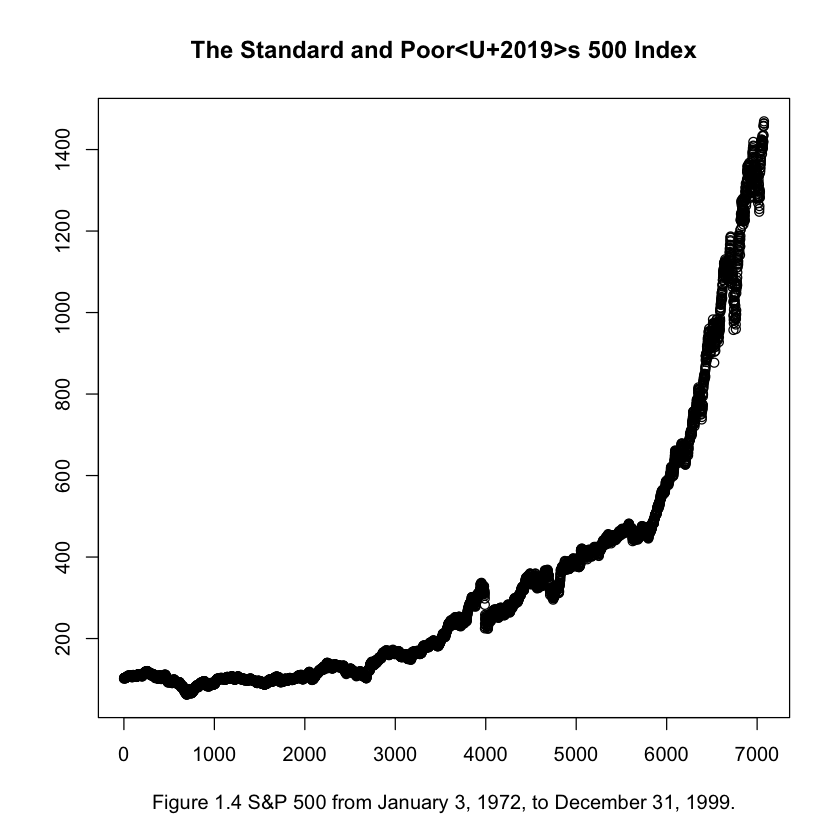

In [45]:
plot(sp500$close_price, ylab="", xlab="Figure 1.4 S&P 500 from January 3, 1972, to December 31, 1999.", main="The Standard and Poor’s 500 Index")